In [1]:
using Plots
pyplot()

Plots.PyPlotBackend()

In [2]:
using Colors

In [101]:
N = 100
init_random = rand(N, N)  #Gives a random number from 0.0 to 1.0 open
lattice_n = zeros(N, N)
lattice_n[init_random .>= 0.999] .= 1
lattice_n[init_random .< 0.999] .= -1

init_random = rand(N, N)  #Gives a random number from 0.0 to 1.0 open
lattice_p = zeros(N, N)
lattice_p[init_random .>= 0.25] .= 1
lattice_p[init_random .< 0.25] .= -1;

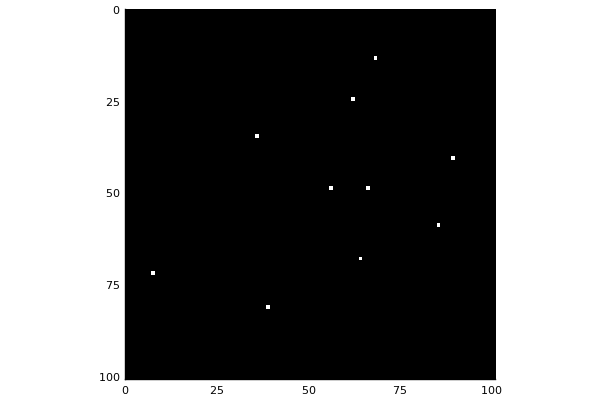

In [102]:
plot(Gray.(lattice_n))

In [95]:
function metropolis(spin_arr, times, BJ, energy)
    N = size(spin_arr, 1)
    spin_arr = copy(spin_arr)
    net_spins = zeros(times)
    net_energy = zeros(times)
    anim = @animate for t in 0:times - 1
        x = rand(1:N)
        y = rand(1:N)
        spin_i = spin_arr[x, y]  # Initial spin
        spin_f = spin_i * -1  # Proposed spin flip
        
        #Compute change in energy
        E_i = 0
        E_f = 0
        
        # Compute the corner points
        if x==1 && y==1
            E_i += -spin_i*spin_arr[1,2] - spin_i*spin_arr[2,1]
            E_f += -spin_f*spin_arr[1,N] - spin_f*spin_arr[N,1]
        end
        
        if x==1 && y==N
            E_i += -spin_i*spin_arr[1,N-1] - spin_i*spin_arr[2,N]
            E_f += -spin_f*spin_arr[1,1] - spin_f*spin_arr[N,N]
        end
        
        if x==N && y==1
            E_i += -spin_i*spin_arr[1,1] - spin_i*spin_arr[N,N]
            E_f += -spin_f*spin_arr[N,2] - spin_f*spin_arr[N-1,1]
        end
        
        if x==N && y==N
            E_i += -spin_i*spin_arr[N,1] - spin_i*spin_arr[N,N-1]
            E_f += -spin_f*spin_arr[1,N] - spin_f*spin_arr[N-1,N]
        end
        
        # Compute points at the boundaries        
        if (x==1 && y>1) && (x==1 && y<N)
            E_i += -spin_i*spin_arr[x,y-1] - spin_i*spin_arr[x,y+1]
            E_f += -spin_f*spin_arr[N,y] - spin_f*spin_arr[x+1,y]
        end
        
        if (x==N && y>1) && (x==N && y<N)
            E_i += -spin_i*spin_arr[x,y-1] - spin_i*spin_arr[x,y+1]
            E_f += -spin_f*spin_arr[1,y] - spin_f*spin_arr[x-1,y]
        end
        
        if (y==1 && x>1) && (y==1 && x<N) 
            E_i += -spin_i*spin_arr[y,x+1] - spin_i*spin_arr[y,x-1]
            E_f += -spin_f*spin_arr[x,N] - spin_f*spin_arr[x,y+1]
        end
        
        if (y==N && x>1) && (y==N && x<N)
            E_i += -spin_i*spin_arr[x+1,y] - spin_i*spin_arr[x-1,y]
            E_f += -spin_f*spin_arr[x,y-1] - spin_f*spin_arr[x,1]
        end
        
        #Rest of the points
        if (x>1 && x<N) && (y>1 && y<N)
            E_i += -spin_i*spin_arr[x-1,y] - spin_i*spin_arr[(x+1),y]
            E_f += -spin_f*spin_arr[x-1,y] - spin_f*spin_arr[(x+1),y]
        
            E_i += -spin_i*spin_arr[x,y-1] - spin_i*spin_arr[x,(y+1)]
            E_f += -spin_f*spin_arr[x,y-1] - spin_f*spin_arr[x,(y+1)]
        end
        
        dE = E_f - E_i
        if dE > 0 && rand() < exp(-BJ * dE)
            spin_arr[x, y] = spin_f
            energy += dE
        elseif dE ≤ 0
            spin_arr[x, y] = spin_f
            energy += dE
        end
        
        s = sum(spin_arr)
        net_spins[t + 1] = s
        net_energy[t + 1] = energy
        if t % 500 == 0
            plot(Gray.(spin_arr), title="M=$s, E=$energy")
        end
        end every 500
        
    return net_spins, net_energy, spin_arr, anim
end

metropolis (generic function with 1 method)

In [96]:
function energy_density_ising2d(s)
    m, n = size(s)
    E = 0.0
    @inbounds begin
        for j in 1:n, i in 1:m-1
            E -= s[i,j]*s[i+1,j]
        end
        for j in 1:n
            E -= s[m,j]*s[1,j]
        end
        for j in 1:n-1, i in 1:m
            E -= s[i,j]*s[i,j+1]
        end
        for i in 1:m
            E -= s[i,m]*s[i,1]
        end
    end
    E
end

energy_density_ising2d (generic function with 1 method)

 29.246620 seconds (1.80 M allocations: 128.162 MiB, 0.19% gc time, 0.86% compilation time)


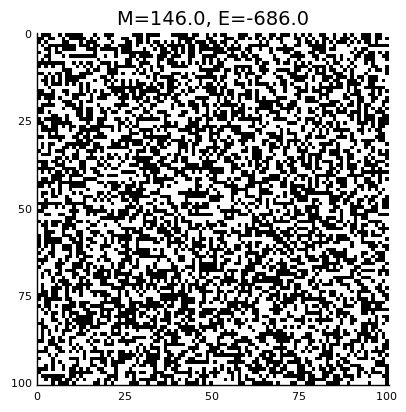

([-9980.0, -9978.0, -9976.0, -9974.0, -9972.0, -9970.0, -9968.0, -9966.0, -9964.0, -9962.0  …  98.0, 96.0, 94.0, 92.0, 94.0, 92.0, 90.0, 92.0, 94.0, 96.0], [-19920.0, -19912.0, -19904.0, -19896.0, -19888.0, -19880.0, -19872.0, -19864.0, -19856.0, -19848.0  …  -660.0, -660.0, -664.0, -664.0, -660.0, -660.0, -660.0, -664.0, -660.0, -660.0], [1.0 -1.0 … 1.0 1.0; -1.0 -1.0 … 1.0 -1.0; … ; 1.0 1.0 … 1.0 -1.0; 1.0 1.0 … -1.0 -1.0], Animation("C:\\Users\\CAF2~1\\AppData\\Local\\Temp\\jl_c4iTke", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000191.png", "000192.png", "000193.png", "000194.png", "000195.png", "000196.png", "000197.png", "000198.png", "000199.png", "000200.png"]))

In [97]:
net_spins, net_energy, spin_arr, anim = @time metropolis(lattice_n, 100000, 0.01, energy_density_ising2d(lattice_n))

In [98]:
mp4(anim)

┌ Info: Saved animation to 
│   fn = C:\Users\κωτς\Desktop\BROWN UNIVERSITY\CHEM 1150 - 2nd time\tmp.mp4
└ @ Plots C:\Users\κωτς\.julia\packages\Plots\rDbWY\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\κωτς\\Desktop\\BROWN UNIVERSITY\\CHEM 1150 - 2nd time\\tmp.mp4")